In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
color= sns.color_palette()
sns.set_style('darkgrid')

In [3]:
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")

Id = df_test["Id"]

df_train.set_index("Id", inplace = True)
df_test.set_index("Id", inplace = True)

In [4]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


In [7]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
def numerical_comp(df, var):
    data = pd.concat([df['SalePrice'], df[var]], axis = 1)

#     f, ax = plt.subplots(figsize=(8,6))
    data.plot.scatter(x=var, y='SalePrice')
#     data.plot.scatter(x=var, y=0)

    plt.xticks(rotation=90)
    

In [10]:
# Retrieve numeric vars
train_numeric = df_train.dtypes[df_train.dtypes != 'object'].index

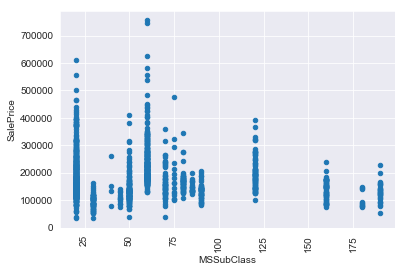

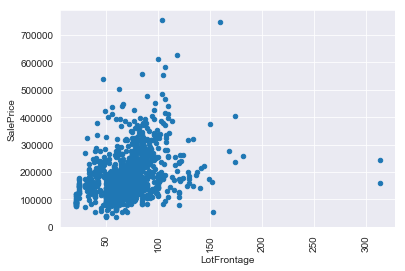

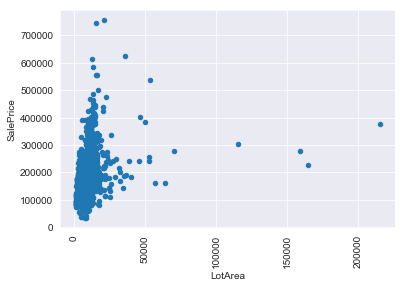

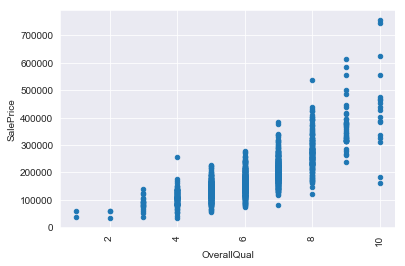

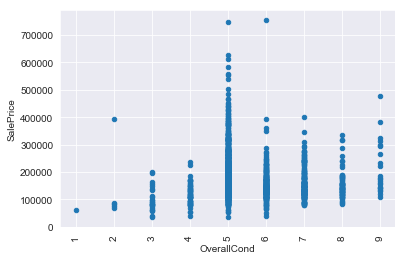

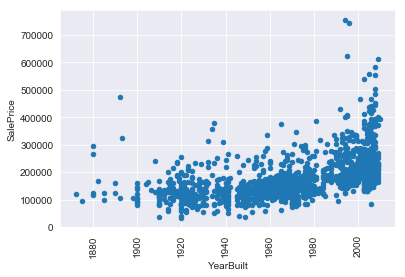

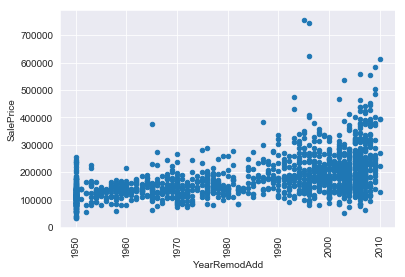

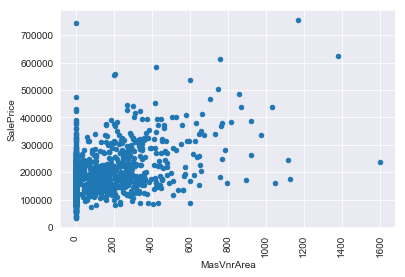

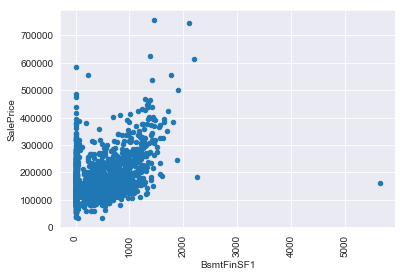

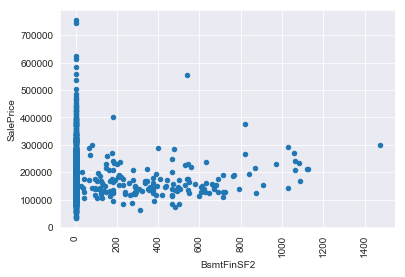

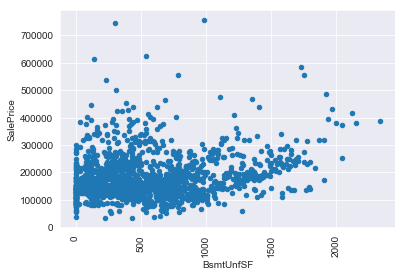

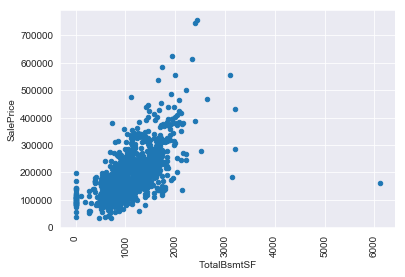

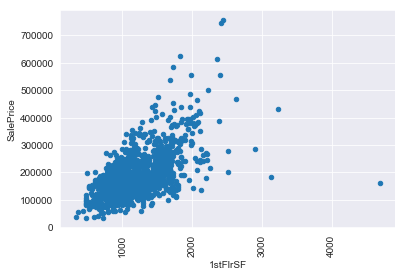

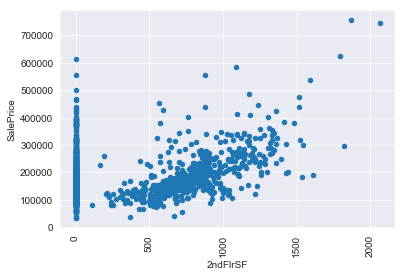

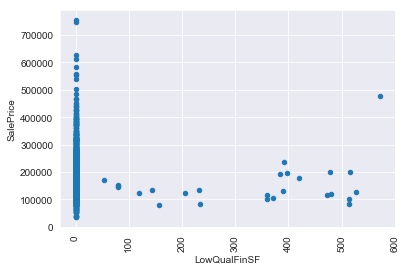

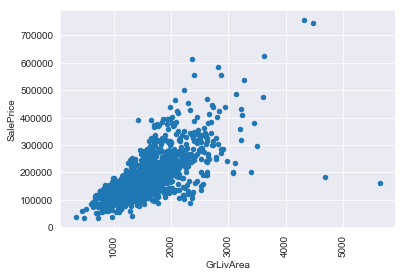

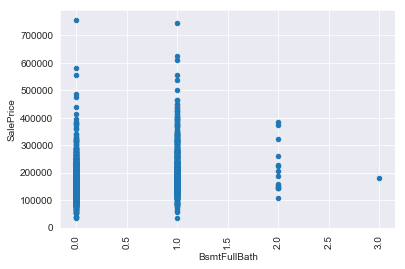

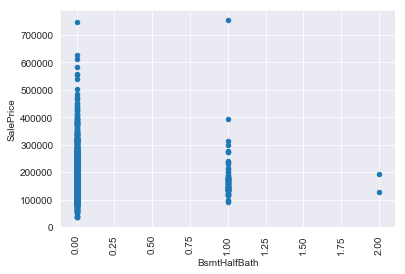

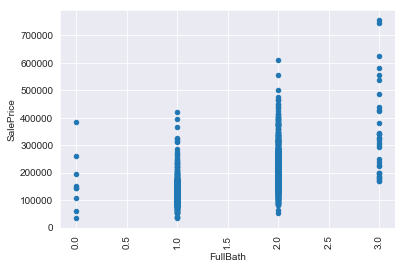

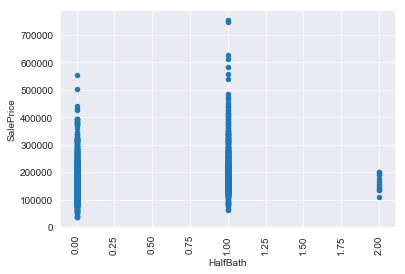

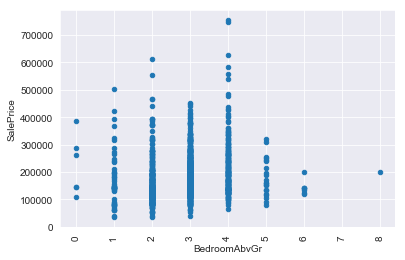

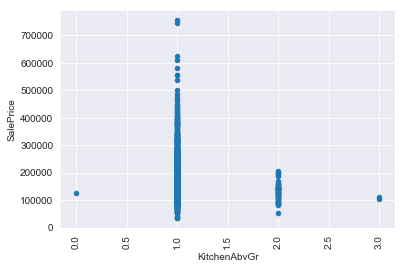

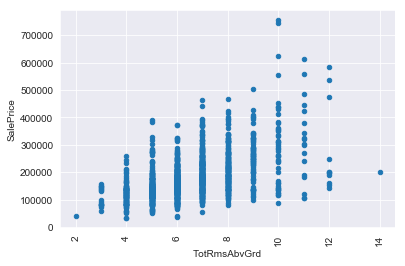

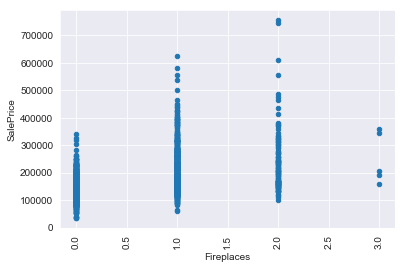

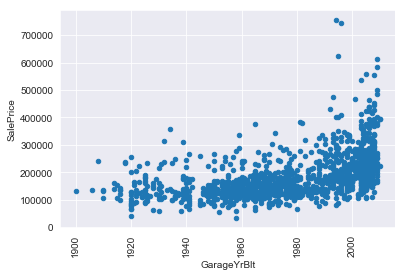

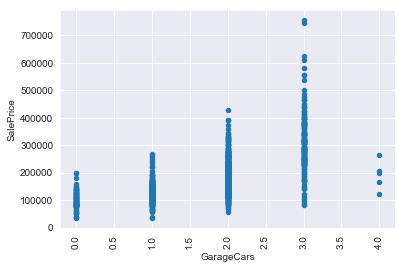

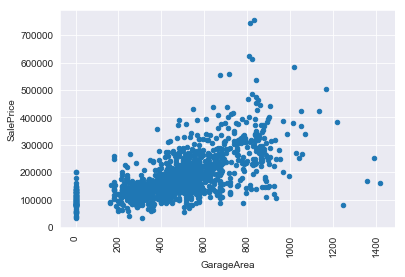

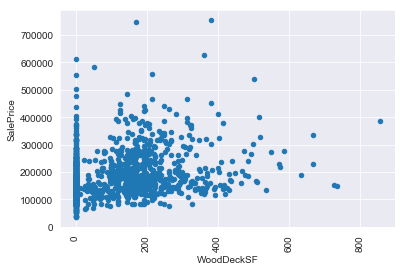

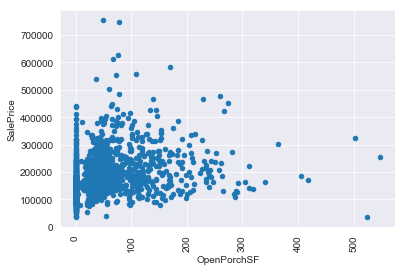

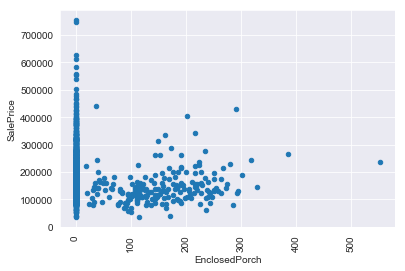

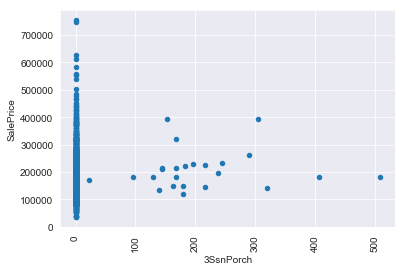

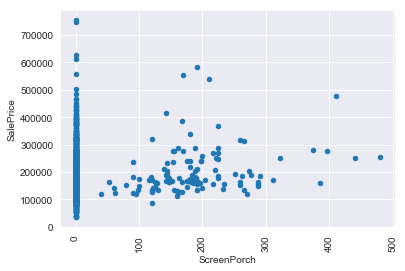

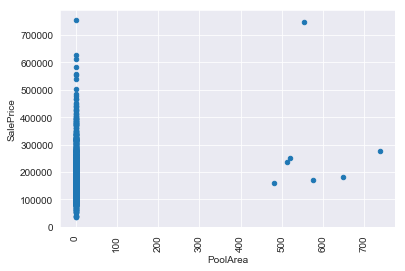

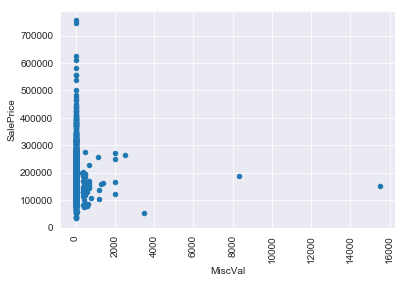

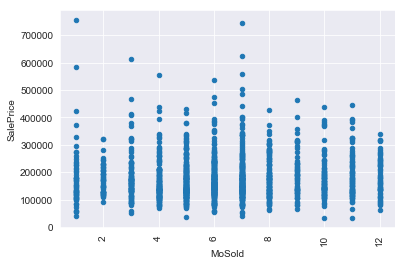

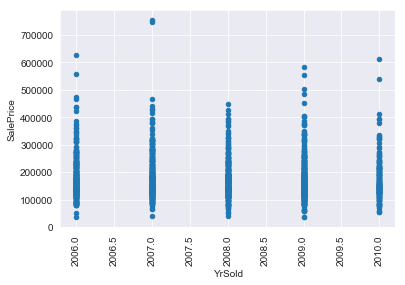

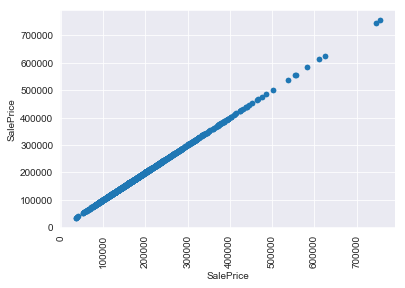

In [11]:
for numeric in train_numeric:
    numerical_comp(df_train, numeric)

In [12]:
#Outlier features

outlier_features = [
    'LotFrontage',
    'BsmtFinSF1',
    'TotalBsmtSF',
    '1stFlrSF',
    'GrLivArea'
]

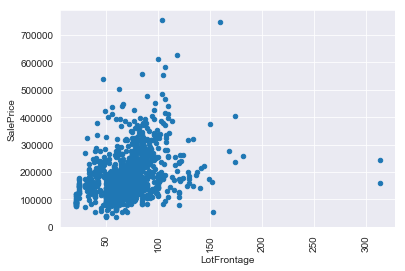

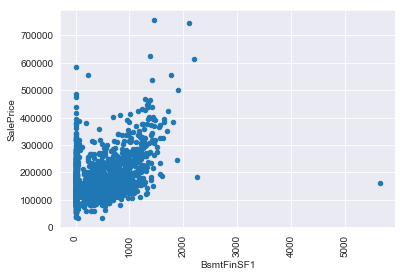

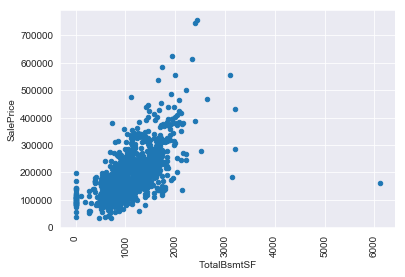

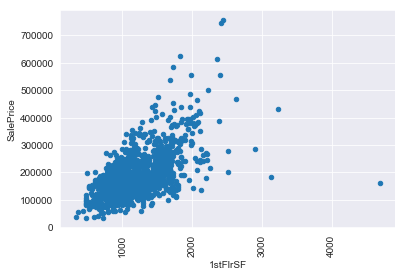

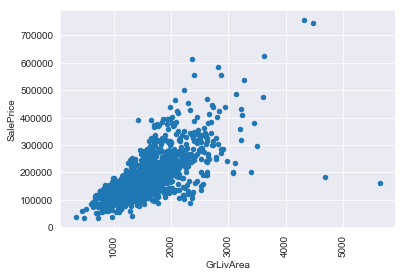

In [13]:
for outlier in outlier_features:
    numerical_comp(df_train, outlier)

In [14]:
df_train.drop(df_train[(df_train['GrLivArea']>4000) &
                       (df_train['SalePrice'] < 300000)].index,
             inplace = True)

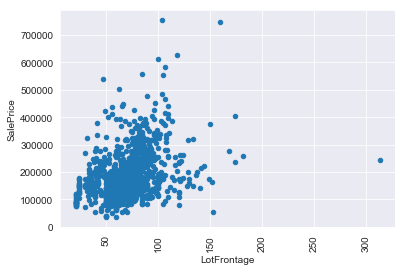

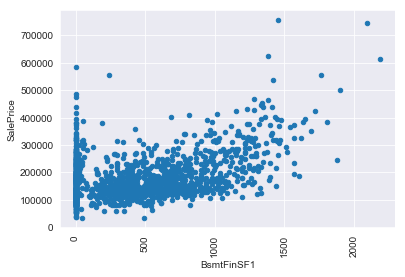

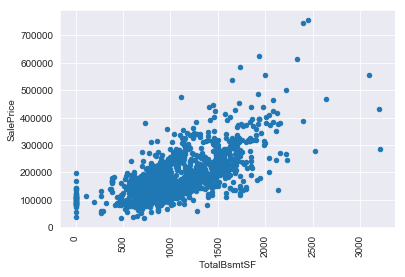

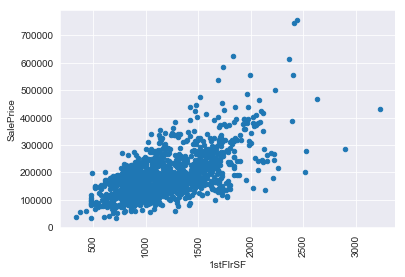

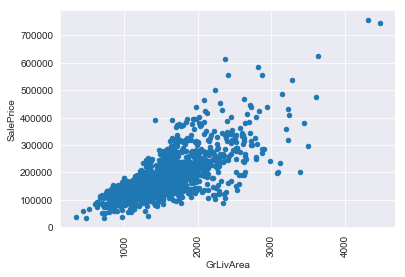

In [15]:
for outlier in outlier_features:
    numerical_comp(df_train, outlier)

In [16]:
#No more outliers, we will later drop the LotFrontage column

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text xticklabel objects>)

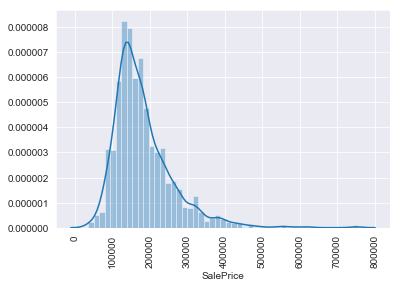

In [17]:
# plt.hist(df_train["SalePrice"], normed=True)

sns.distplot(df_train['SalePrice'])
plt.xticks(rotation=90)

In [18]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


In [19]:
# null_values = df_train.isnull().sum().loc[lambda x: x > 0]
# null_count = len(df_train)
# null_percent = null_values / null_count
# pd.DataFrame({"null_count":null_values, "null_percent":null_percent}).\
#     sort_values(['null_count'], ascending=False)

In [20]:
# missing_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
#                   'FireplaceQu', 'LotFrontage']
# df_train.drop(missing_columns, inplace=True, axis=1)
# df_test.drop(missing_columns, inplace=True, axis=1)

In [21]:
# null_values = df_train.isnull().sum().loc[lambda x: x > 0]
# null_count = len(df_train)
# null_percent = null_values / null_count
# pd.DataFrame({"null_count":null_values, "null_percent":null_percent}).\
#     sort_values(['null_count'], ascending=False)


 mu = 180932.92 and sigma = 79467.79



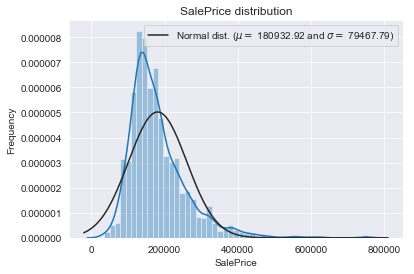

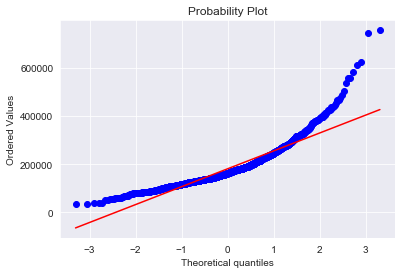

In [22]:
sns.distplot(df_train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()


 mu = 12.02 and sigma = 0.40



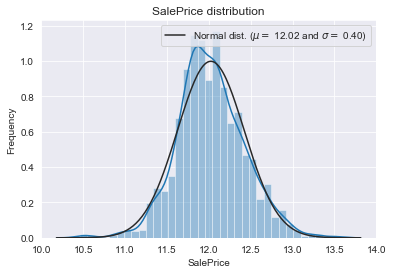

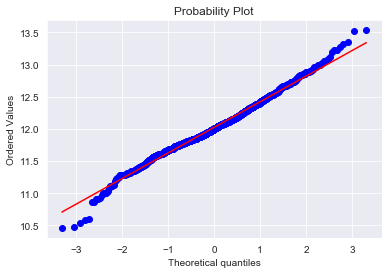

In [23]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

sns.distplot(df_train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()

In [24]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [25]:
feature_categories = {
    'MSSubClass': 'c',
    'MSZoning': 'c',
    'LotArea': 'n',
    'Street': 'c',
    'LotShape': 'c',
    'LandContour': 'c',
    'Utilities': 'c',
    'LotConfig': 'c',
    'LandSlope': 'c',
    'Neighborhood': 'c',
    'Condition1': 'c',
    'Condition2': 'c',
    'BldgType': 'c',
    'HouseStyle': 'c',
    'OverallQual': 'c',
    'OverallCond': 'c',
    'YearBuilt': 'n',
    'YearRemodAdd': 'n',
    'RoofStyle': 'c',
    'RoofMatl': 'c',
    'Exterior1st': 'c',
    'Exterior2nd': 'c',
    'MasVnrType': 'c',
    'MasVnrArea': 'n',
    'ExterQual': 'c',
    'ExterCond': 'c',
    'Foundation': 'c',
    'BsmtQual': 'c',
    'BsmtCond': 'c',
    'BsmtExposure': 'c',
    'BsmtFinType1': 'c',
    'BsmtFinSF1': 'n',
    'BsmtFinType2': 'c',
    'BsmtFinSF2': 'n',
    'BsmtUnfSF': 'n',
    'TotalBsmtSF': 'n',
    'Heating': 'c',
    'HeatingQC': 'c',
    'CentralAir': 'c',
    'Electrical': 'c',
    '1stFlrSF': 'n',
    '2ndFlrSF': 'n',
    'LowQualFinSF': 'n',
    'GrLivArea': 'n',
    'BsmtFullBath': 'n',
    'BsmtHalfBath': 'n',
    'FullBath': 'n',
    'HalfBath': 'n',
    'KitchenAbvGr': 'n',
    'KitchenQual': 'c',
    'TotRmsAbvGrd': 'n',
    'Functional': 'c',
    'Fireplaces': 'n',
    'GarageType': 'c',
    'GarageYrBlt': 'n',
    'GarageFinish': 'c',
    'GarageCars': 'n',
    'GarageArea': 'n',
    'GarageQual': 'c',
    'GarageCond': 'c',
    'PavedDrive': 'c',
    'WoodDeckSF': 'n',
    'OpenPorchSF': 'n',
    'EnclosedPorch': 'n',
    '3SsnPorch': 'n',
    'ScreenPorch': 'n',
    'PoolArea': 'n',
    'MiscVal': 'n',
    'MoSold': 'c',
    'YrSold': 'n',
    'SaleType': 'c',
    'SaleCondition': 'c'
}

In [26]:
#Concatenate train and test data

ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train['SalePrice'].values
all_data = pd.concat((df_train, df_test))
all_data.drop(['SalePrice'], axis=1, inplace = True)

In [27]:
all_data.head(7)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
6,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
7,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007


In [28]:
null_values = all_data.isnull().sum().loc[lambda x: x > 0]
null_count = len(all_data)
null_percent = null_values / null_count
null_df = pd.DataFrame({"null_count":null_values, "null_percent":null_percent}).\
    sort_values(['null_count'], ascending=False)
null_df

,null_count,null_percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageCond,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508


In [29]:
null_df.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'Utilities', 'Functional',
       'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 'Exterior2nd',
       'Exterior1st', 'KitchenQual', 'Electrical', 'BsmtUnfSF', 'BsmtFinSF2',
       'BsmtFinSF1', 'SaleType', 'TotalBsmtSF', 'GarageArea'],
      dtype='object')

In [30]:
# data descriptions for 'PoolQC', 'MiscFeature', 'Alley', 'Fence',
# 'FireplaceQu' state NA means feature does not exist

all_data['PoolQC'] = all_data['PoolQC'].fillna("None")
all_data['MiscFeature'] = all_data['MiscFeature'].fillna("None")
all_data['Alley'] = all_data['Alley'].fillna("None")
all_data['Fence'] = all_data['Fence'].fillna("None")
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna("None")

In [31]:
#LotFrontage covered by LotArea
all_data.drop(['LotFrontage'], axis=1, inplace = True)

In [32]:
#Garage Categorical vars, replace null with "None"

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [33]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)

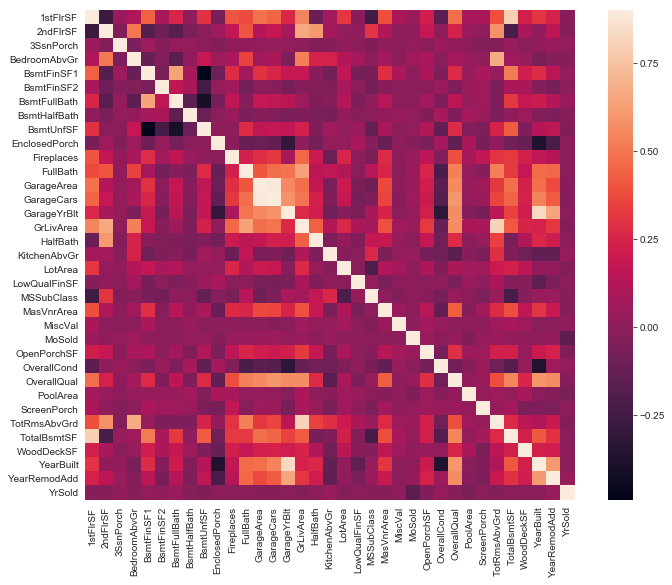

In [34]:
#Correlation map to see how features are correlated with Sale Price

corrmat = all_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [35]:
all_data.drop(['GarageYrBlt'], axis = 1, inplace=True)
all_data.drop(['GarageCars'], axis = 1, inplace=True)

In [36]:
#Bsmt missing values replaced with 0, 'no basement'
basement_num = [
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath'
]

In [37]:
for base in basement_num:
    all_data[base] = all_data[base].fillna(0)

In [38]:
#Bsmt categorical missing values replace with None

basement_cat = [
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2'
]

In [39]:
for base in basement_cat:
    all_data[base] = all_data[base].fillna('None')

In [40]:
# Replace missing Masonry values with 0 and None

all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

In [41]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [42]:
all_data['MSZoning'].isnull().sum()

4

In [43]:
# Replace mszoning missing values with 'RL'

all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')

In [44]:
all_data.isnull().sum().loc[lambda x: x > 0]

Electrical     1
Exterior1st    1
Exterior2nd    1
Functional     2
KitchenQual    1
SaleType       1
Utilities      2
dtype: int64

In [45]:
for index in all_data.isnull().sum().loc[lambda x: x > 0].index:
    print(all_data[index].value_counts())

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64
WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType,

In [46]:
all_data.drop(['Utilities'], inplace = True, axis=1)

In [47]:
#Functional 'na' == 'Typ'

all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [48]:
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

In [49]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')

In [50]:
all_data['SaleType'] = all_data['SaleType'].fillna('WD')

In [51]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [52]:
#Transforming some numerical variables that are really categorical

all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['OverallQual'] = all_data['OverallQual'].astype(str)

all_data['MoSold'] = all_data['MoSold'].astype(str)

# all_data['YrSold'] = all_data['YrSold'].astype(str)

In [53]:
all_data.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

In [54]:
year_features = [
    'YearRemodAdd',
    'YrSold'
]

In [55]:
all_data[year_features].describe()

,YearRemodAdd,YrSold
count,2917.000000,2917.000000
mean,1984.248200,2007.792938
std,20.892257,1.315328
min,1950.000000,2006.000000
25%,1965.000000,2007.000000
50%,1993.000000,2008.000000
75%,2004.000000,2009.000000
max,2010.000000,2010.000000


In [56]:
all_data['YearsOld'] = all_data['YrSold'] - all_data['YearRemodAdd']

In [57]:
all_data['YearsOld'].describe()

count    2917.000000
mean       23.544738
std        20.889738
min        -2.000000
25%         4.000000
50%        15.000000
75%        43.000000
max        60.000000
Name: YearsOld, dtype: float64

In [58]:
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)

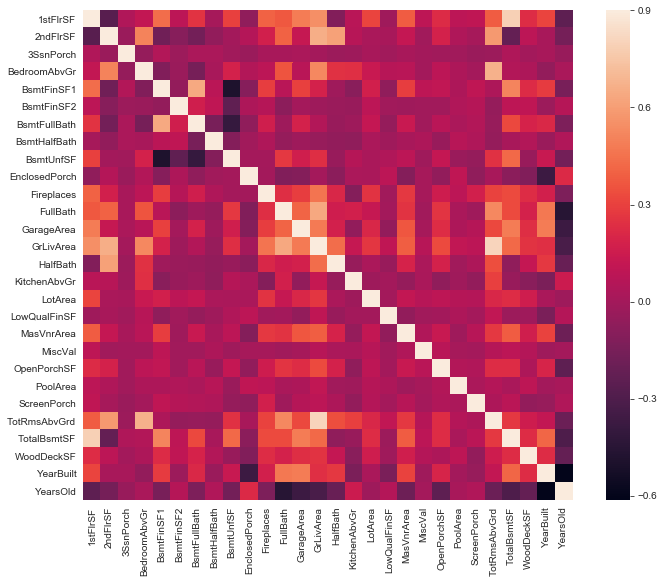

In [59]:
#Correlation map to see how features are correlated with Sale Price

corrmat = all_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [60]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,YearsOld
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,0,2003,2003,2008,5
2,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,298,1976,1976,2007,31
3,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,0,2001,2002,2008,6
4,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,0,1915,1970,2006,36
5,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,192,2000,2000,2008,8


In [ ]:
# def categorical_comp(df, var):
#     data = pd.concat([ytrain, df[var]], axis = 1).sort_values(var, ascending=False)

#     f, ax = plt.subplots(figsize=(8,6))
#     fig = sns.boxplot(x=var, y='SalePrice', data = data)
#     plt.xticks(rotation=90)

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
#Label Encoding some categorical variables that may contain information in their ordering set

cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
       'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual',
       'BsmtFinType1', 'BsmtFinType2', 'Functional', 'BsmtExposure', 
       'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street',
       'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold',
       'MoSold', 'YearRemodAdd')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
    
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 76)


In [63]:
all_data[list(cols)].head()

,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,BsmtFinType1,...,LandSlope,LotShape,PavedDrive,Street,CentralAir,MSSubClass,OverallCond,YrSold,MoSold,YearRemodAdd
Id,,,,,,,,,,,,,,,,,,,,,
1,2,4,5,5,2,4,0,3,2,2,...,0,3,2,1,1,10,4,2,4,53
2,2,4,5,5,3,4,0,3,3,0,...,0,3,2,1,1,5,7,1,7,26
3,2,4,5,5,2,4,0,3,2,2,...,0,0,2,1,1,10,4,2,11,52
4,4,1,5,5,3,4,2,3,2,0,...,0,0,2,1,1,11,4,0,4,20
5,2,4,5,5,2,4,0,3,2,2,...,0,0,2,1,1,10,4,2,3,50


### Skewed Features

In [64]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

In [65]:
numeric_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fireplaces',
       'FullBath', 'Functional', 'GarageArea', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr',
       'KitchenQual', 'LandSlope', 'LotArea', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'ScreenPorch',
       'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'YearsOld'],
      dtype='object')

In [66]:
#Check the skew of all numerical features

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).\
                    sort_values(ascending=False)

In [69]:
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


### Box Cox Transformation of skewed features

In [ ]:
#We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .
#Note that setting  λ=0  is equivalent to log1p used above for the target variable.

In [70]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cos transform".\
     format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 52 skewed numerical features to Box Cos transform


In [71]:
# Getting dummy categorical features

all_data = pd.get_dummies(all_data, drop_first = True)

In [72]:
# Getting the new train and test sets

train = all_data[:ntrain]
test = all_data[ntrain:]

## Modeling

In [74]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [75]:
# Define a cross validation strategy
# We use the cross_val_score function of Sklearn. However this function 
# has not a shuffle attribute, we add then one line of code, in order 
# to shuffle the dataset prior to cross-validation

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train,
                                   scoring="neg_mean_squared_error",
                                   cv = kf))
    return(rmse)

### Base models

In [76]:
# LASSO Regression
#This model may be very sensitive to outliers. So we need to make it 
#more robust on them. Fort that we use the sklearn's Robustscaler()
# method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

In [77]:
#Elastic Net Regression
# again made robust to outliers

ENet= make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005,
                                              l1_ratio=.9,
                                              random_state=3))

In [78]:
# Kernal Ridge Regression

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [80]:
# Gradient Boosting Regression
# With 'huber' loss that makes it robust to outliers

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.5,
                                  max_depth=4, max_features='sqrt',
                                  min_samples_leaf=15, min_samples_split=10,
                                  loss='huber', random_state=5)

In [81]:
XGBoost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma = 0.0468,
                          learning_rate=0.05, max_depth=3,
                          min_child_weight=1.7817, n_estimators=2200,
                          reg_alpha=0.4640, reg_lambda=0.8571,
                          subsample=0.5213, silent=1,
                          random_state=7, nthread=-1)

In [82]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                             learning_rate=0.05, n_estimators=720,
                             max_bin=55, bagging_fraction=0.8,
                             bagging_freq=5, feature_fraction=0.2319,
                             feature_fraction_seed=9, bagging_seed=9,
                             min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

In [ ]:
# # df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

# sns.distplot(df_train['GarageArea'][df_train['GarageArea'] > 0], fit=norm)

# (mu, sigma) = norm.fit(df_train['GarageArea'][df_train['GarageArea'] > 0])

# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
#            loc = 'best')
# plt.ylabel('Frequency')
# plt.title('GarageArea distribution')

# fig = plt.figure()
# res = stats.probplot(df_train['GarageArea'][df_train['GarageArea'] > 0], plot = plt)
# plt.show()